In [219]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
%matplotlib inline

In [220]:
sym = ['AXP','BA','CAT','CSCO','CVX','DD','DIS','GE', 
        'GS','HD','IBM','INTC','JNJ','JPM','KO','MCD', 
        'MMM','MRK','MSFT','NKE','PFE','PG','T','TRV', 
        'UNH','UTX','V','VZ','WMT','XOM','GOOGL','TSLA','AMZN','NFLX']
API_key = 'SF6G3X4HJ80V3H23'

In [221]:
ts = TimeSeries(key=API_key, output_format='pandas')
googl_data, googl_meta = ts.get_daily(symbol='GOOGL', outputsize='full')
Msft_data, msft_meta = ts.get_daily(symbol='MSFT', outputsize='full')
Amzn_data, amzn_meta = ts.get_daily(symbol='AMZN', outputsize='full')
Nflx_data, nflx_meta = ts.get_daily(symbol='NFLX', outputsize='full')

In [222]:
print(googl_data.shape,Msft_data.shape,Amzn_data.shape,Nflx_data.shape)

(4508, 5) (5713, 5) (5713, 5) (5072, 5)


In [223]:
googl_data.reset_index(inplace=True)
Msft_data.reset_index(inplace=True)
Amzn_data.reset_index(inplace=True)
Nflx_data.reset_index(inplace=True)

In [224]:
print(googl_data.columns)
print(Msft_data.columns)
print(Amzn_data.columns)
print(Nflx_data.columns)

Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [225]:
googl_data.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-07-15,2240.01,2262.81,2218.0000,2235.55,2338456.0
1,2022-07-14,2204.21,2221.86,2167.4600,2207.35,1850152.0
2,2022-07-13,2234.02,2283.92,2224.0300,2227.07,2186101.0
3,2022-07-12,2324.30,2339.48,2273.8044,2280.41,1497985.0
4,2022-07-11,2359.96,2359.96,2306.6100,2313.53,1562185.0


In [226]:
googl_data.rename(columns={googl_data.columns[1]: 'open',googl_data.columns[2]: 'high',googl_data.columns[3]: 'low',googl_data.columns[4]: 'close',googl_data.columns[5]: 'volume'},inplace=True)
Msft_data.rename(columns={Msft_data.columns[1]: 'open',Msft_data.columns[2]: 'high',Msft_data.columns[3]: 'low',Msft_data.columns[4]: 'close',Msft_data.columns[5]: 'volume'},inplace=True)
Amzn_data.rename(columns={Amzn_data.columns[1]: 'open',Amzn_data.columns[2]: 'high',Amzn_data.columns[3]: 'low',Amzn_data.columns[4]: 'close',Amzn_data.columns[5]: 'volume'},inplace=True)
Nflx_data.rename(columns={Nflx_data.columns[1]: 'open',Nflx_data.columns[2]: 'high',Nflx_data.columns[3]: 'low',Nflx_data.columns[4]: 'close',Nflx_data.columns[5]: 'volume'},inplace=True)

In [227]:
print(googl_data.columns)
print(Msft_data.columns)
print(Amzn_data.columns)
print(Nflx_data.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


# LSTM Model

Text(0.5, 1.0, 'Close Price History of Google')

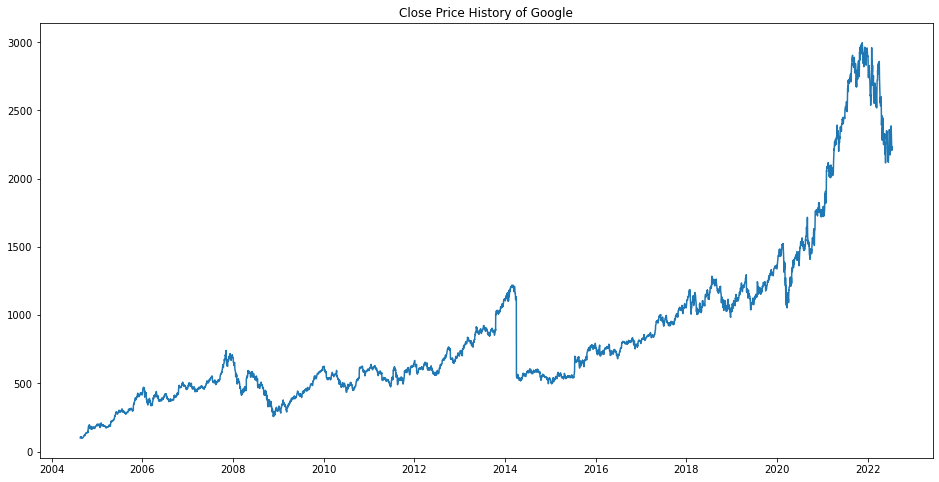

In [228]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(googl_data['date'], googl_data['close']);
plt.title("Close Price History of Google")

In [229]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.plot(Msft_data['date'], Msft_data['close']);
# plt.title("Close Price History of Microsoft")

In [230]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.plot(Amzn_data['date'], Amzn_data['close']);
# plt.title("Close Price History of Amazon")

In [231]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.plot(Nflx_data['date'], Nflx_data['close']);
# plt.title("Close Price History of Netfix")

In [232]:
googl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4508 entries, 0 to 4507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4508 non-null   datetime64[ns]
 1   open    4508 non-null   float64       
 2   high    4508 non-null   float64       
 3   low     4508 non-null   float64       
 4   close   4508 non-null   float64       
 5   volume  4508 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 211.4 KB


In [233]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [234]:
# googl_data = googl_data.set_index('date')

In [235]:
googl_data.head()

,date,open,high,low,close,volume
0,2022-07-15,2240.01,2262.81,2218.0000,2235.55,2338456.0
1,2022-07-14,2204.21,2221.86,2167.4600,2207.35,1850152.0
2,2022-07-13,2234.02,2283.92,2224.0300,2227.07,2186101.0
3,2022-07-12,2324.30,2339.48,2273.8044,2280.41,1497985.0
4,2022-07-11,2359.96,2359.96,2306.6100,2313.53,1562185.0


In [236]:
googl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4508 entries, 0 to 4507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4508 non-null   datetime64[ns]
 1   open    4508 non-null   float64       
 2   high    4508 non-null   float64       
 3   low     4508 non-null   float64       
 4   close   4508 non-null   float64       
 5   volume  4508 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 211.4 KB


In [237]:
data=googl_data.sort_values(by='date')
new_dataset=pd.DataFrame(index=range(0,len(googl_data)),columns=['date','close'])
new_dataset["date"]=data['date']
new_dataset["close"]=data["close"]

In [238]:
data

,date,open,high,low,close,volume
4507,2004-08-19,100.01,104.06,95.9600,100.335,44659000.0
4506,2004-08-20,101.01,109.08,100.5000,108.310,22834300.0
4505,2004-08-23,110.76,113.48,109.0500,109.400,18256100.0
4504,2004-08-24,111.24,111.60,103.5700,104.870,15247300.0
4503,2004-08-25,104.76,108.00,103.8800,106.000,9188600.0
...,...,...,...,...,...,...
4,2022-07-11,2359.96,2359.96,2306.6100,2313.530,1562185.0
3,2022-07-12,2324.30,2339.48,2273.8044,2280.410,1497985.0
2,2022-07-13,2234.02,2283.92,2224.0300,2227.070,2186101.0
1,2022-07-14,2204.21,2221.86,2167.4600,2207.350,1850152.0


In [239]:
new_dataset=new_dataset.sort_values(by='date')

In [240]:
new_dataset.head()

,date,close
4507,2004-08-19,100.335
4506,2004-08-20,108.310
4505,2004-08-23,109.400
4504,2004-08-24,104.870
4503,2004-08-25,106.000


In [241]:
new_dataset.tail()

,date,close
4,2022-07-11,2313.53
3,2022-07-12,2280.41
2,2022-07-13,2227.07
1,2022-07-14,2207.35
0,2022-07-15,2235.55


In [242]:
# new_dataset = new_dataset.set_index('date')

In [243]:
new_dataset.shape

(4508, 2)

In [244]:
new_dataset

,date,close
4507,2004-08-19,100.335
4506,2004-08-20,108.310
4505,2004-08-23,109.400
4504,2004-08-24,104.870
4503,2004-08-25,106.000
...,...,...
4,2022-07-11,2313.530
3,2022-07-12,2280.410
2,2022-07-13,2227.070
1,2022-07-14,2207.350


In [245]:
new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)

final_dataset=new_dataset.values

In [246]:
new_dataset

,close
date,
2004-08-19,100.335
2004-08-20,108.310
2004-08-23,109.400
2004-08-24,104.870
2004-08-25,106.000
...,...
2022-07-11,2313.530
2022-07-12,2280.410
2022-07-13,2227.070


In [247]:
final_dataset

array([[ 100.335],
       [ 108.31 ],
       [ 109.4  ],
       ...,
       [2227.07 ],
       [2207.35 ],
       [2235.55 ]])

In [248]:
train_data=final_dataset[0:3605,:]
valid_data=final_dataset[3605:,:]

In [264]:
train_data

,close
date,
2004-08-19,100.335
2004-08-20,108.310
2004-08-23,109.400
2004-08-24,104.870
2004-08-25,106.000
...,...
2018-12-06,1078.080
2018-12-07,1046.580
2018-12-10,1053.180


In [249]:
print(len(train_data),len(valid_data))

3605 903


In [250]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [251]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [252]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [253]:
x_train_data.shape

(3545, 60, 1)

In [254]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
# lstm_model = Sequential()
# lstm_model.add(LSTM(128, return_sequences=True, input_shape= (x_train_data.shape[1], 1)))
# lstm_model.add(LSTM(64, return_sequences=False))
# lstm_model.add(Dense(25))
# lstm_model.add(Dense(1))
# model.compile(optimizer='adam',loss='mean_squared_error')
# model.fit(X_train,y_train,epochs=100,batch_size=32)

In [255]:
from keras import metrics
lstm_model.compile(loss='mean_squared_error',optimizer='adam',metrics=[metrics.MeanSquaredError()])
lstm_model.fit(x_train_data,y_train_data,epochs=5,batch_size=32,verbose=True)

Epoch 1/5
111/111 [==============================] - 19s 84ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2/5
111/111 [==============================] - 10s 91ms/step - loss: 1.6618e-04 - mean_squared_error: 1.6618e-04
Epoch 3/5
111/111 [==============================] - 10s 86ms/step - loss: 1.7034e-04 - mean_squared_error: 1.7034e-04
Epoch 4/5
111/111 [==============================] - 10s 90ms/step - loss: 1.4462e-04 - mean_squared_error: 1.4462e-04
Epoch 5/5
111/111 [==============================] - 10s 88ms/step - loss: 1.1762e-04 - mean_squared_error: 1.1762e-04


In [256]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [257]:
inputs_data.shape

(963, 1)

In [258]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
y_test = final_dataset[3605:, :]
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

lstm_model.save("saved_lstm_model.h5")

train_data=new_dataset[:3605]
valid_data=new_dataset[3605:]
valid_data['Predictions']=closing_price
# fig, ax = plt.subplots(figsize=(16,8))
# ax.plot(train_data["close"])
# ax.plot(valid_data[['close',"Predictions"]])
# plt.legend(['Train', 'Val', 'Predictions'])

C:\Users\NANCYM~1\AppData\Local\Temp/ipykernel_17948/3801250360.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=closing_price


In [259]:
print(len(closing_price),len(y_test))

903 903


In [260]:
rmse = np.sqrt(np.mean(((closing_price - y_test) ** 2)))
rmse

75.05102043819834

In [261]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, closing_price)
print('MSE: %f' % mse)

MSE: 5632.655669


In [262]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, closing_price)
print('R2_score: %f' % r2)

R2_score: 0.985993


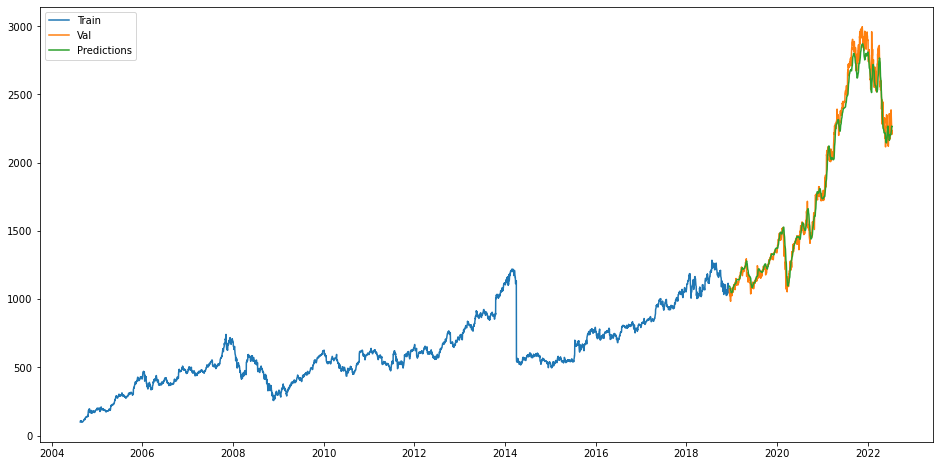

In [263]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(train_data["close"])
ax.plot(valid_data[['close',"Predictions"]])
plt.legend(['Train', 'Val', 'Predictions'])

In [155]:
valid = data[3605:]
valid['Predictions'] = closing_price

C:\Users\NANCYM~1\AppData\Local\Temp/ipykernel_17948/2444764876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


In [156]:
valid

,date,open,high,low,close,volume,Predictions
902,2018-12-13,1075.67,1088.42,1064.9900,1073.54,1249403.0,1046.310791
901,2018-12-14,1060.02,1071.72,1049.3700,1051.71,1817949.0,1045.685181
900,2018-12-17,1047.01,1062.38,1016.6300,1025.65,2496551.0,1044.011963
899,2018-12-18,1034.00,1059.69,1030.4800,1043.41,2182019.0,1040.260498
898,2018-12-19,1047.29,1075.71,1019.4300,1035.46,2913237.0,1036.212158
...,...,...,...,...,...,...,...
4,2022-07-11,2359.96,2359.96,2306.6100,2313.53,1562185.0,2145.734375
3,2022-07-12,2324.30,2339.48,2273.8044,2280.41,1497985.0,2159.916992
2,2022-07-13,2234.02,2283.92,2224.0300,2227.07,2186101.0,2170.030273
1,2022-07-14,2204.21,2221.86,2167.4600,2207.35,1850152.0,2173.268799


# ARIMA Model

In [180]:
googl_data, googl_meta = ts.get_daily(symbol='GOOGL', outputsize='full')

In [183]:
googl_data.rename(columns={googl_data.columns[0]: 'open',googl_data.columns[1]: 'high',googl_data.columns[2]: 'low',googl_data.columns[3]: 'close',googl_data.columns[4]: 'volume'},inplace=True)

In [184]:
googl_data.head()

,open,high,low,close,volume
date,,,,,
2022-07-15,2240.01,2262.81,2218.0000,2235.55,2338456.0
2022-07-14,2204.21,2221.86,2167.4600,2207.35,1850152.0
2022-07-13,2234.02,2283.92,2224.0300,2227.07,2186101.0
2022-07-12,2324.30,2339.48,2273.8044,2280.41,1497985.0
2022-07-11,2359.96,2359.96,2306.6100,2313.53,1562185.0


In [185]:
googl_data=googl_data.sort_index(ascending=True)

In [186]:
googl_data

,open,high,low,close,volume
date,,,,,
2004-08-19,100.01,104.06,95.9600,100.335,44659000.0
2004-08-20,101.01,109.08,100.5000,108.310,22834300.0
2004-08-23,110.76,113.48,109.0500,109.400,18256100.0
2004-08-24,111.24,111.60,103.5700,104.870,15247300.0
2004-08-25,104.76,108.00,103.8800,106.000,9188600.0
...,...,...,...,...,...
2022-07-11,2359.96,2359.96,2306.6100,2313.530,1562185.0
2022-07-12,2324.30,2339.48,2273.8044,2280.410,1497985.0
2022-07-13,2234.02,2283.92,2224.0300,2227.070,2186101.0


In [187]:
googl_data.reset_index(inplace=True)

In [188]:
googl_data

,date,open,high,low,close,volume
0,2004-08-19,100.01,104.06,95.9600,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.5000,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.0500,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.5700,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.8800,106.000,9188600.0
...,...,...,...,...,...,...
4503,2022-07-11,2359.96,2359.96,2306.6100,2313.530,1562185.0
4504,2022-07-12,2324.30,2339.48,2273.8044,2280.410,1497985.0
4505,2022-07-13,2234.02,2283.92,2224.0300,2227.070,2186101.0
4506,2022-07-14,2204.21,2221.86,2167.4600,2207.350,1850152.0


In [189]:
googl_data['date'][4507]

Timestamp('2022-07-15 00:00:00')

In [192]:
googl_data.head()

,date,open,high,low,close,volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0


Text(0.5, 1.0, 'Google Autocorrelation plot')

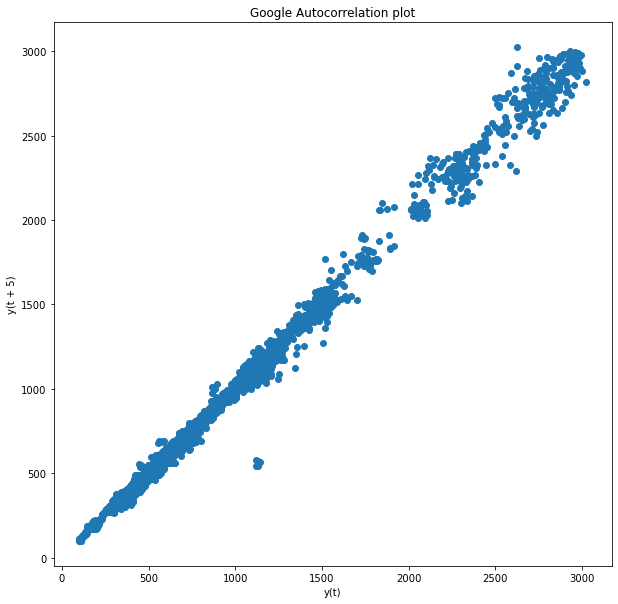

In [193]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot(googl_data['open'], lag=5)
plt.title('Google Autocorrelation plot')

Text(0.5, 1.0, 'Close Price History of Google')

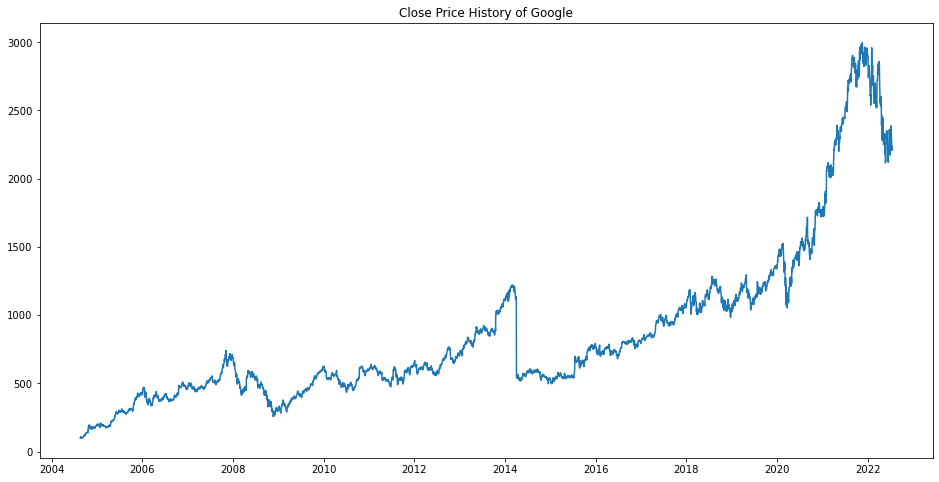

In [194]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(googl_data['date'], googl_data['close']);
plt.title("Close Price History of Google")

In [195]:
googl_data['date'][4507]

Timestamp('2022-07-15 00:00:00')

In [196]:
googl_data

,date,open,high,low,close,volume
0,2004-08-19,100.01,104.06,95.9600,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.5000,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.0500,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.5700,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.8800,106.000,9188600.0
...,...,...,...,...,...,...
4503,2022-07-11,2359.96,2359.96,2306.6100,2313.530,1562185.0
4504,2022-07-12,2324.30,2339.48,2273.8044,2280.410,1497985.0
4505,2022-07-13,2234.02,2283.92,2224.0300,2227.070,2186101.0
4506,2022-07-14,2204.21,2221.86,2167.4600,2207.350,1850152.0


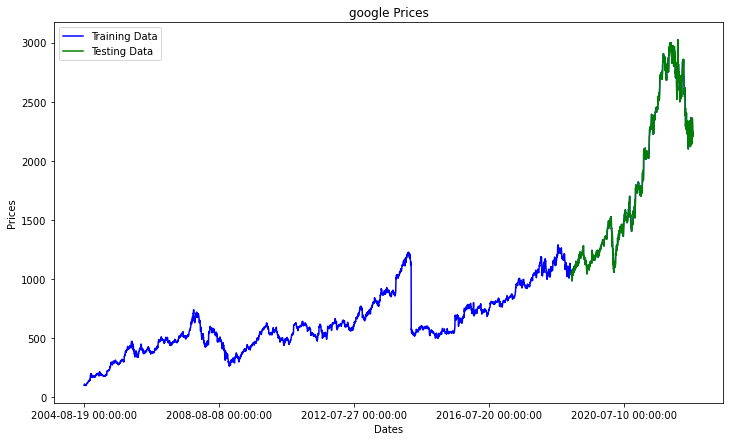

In [200]:
train_data, test_data = googl_data[0:int(len(googl_data)*0.8)], googl_data[int(len(googl_data)*0.8):]
plt.figure(figsize=(12,7))
plt.title('google Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(googl_data['open'], 'blue', label='Training Data')
plt.plot(test_data['open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,4507, 1000), googl_data['date'][0:4507:1000])
plt.legend()

In [201]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [212]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
train_ar = train_data['close'].values
test_ar = test_data['close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 1295.926
Symmetric mean absolute percentage error: 37.943


In [213]:
error3 = r2_score(test_ar, predictions)
print('r2 score percentage error: %.3f' % error3)

r2 score percentage error: 0.997


C:\Users\NANCYM~1\AppData\Local\Temp/ipykernel_17948/4216732886.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(googl_data['close'], 'green', color='blue', label='Training Data')


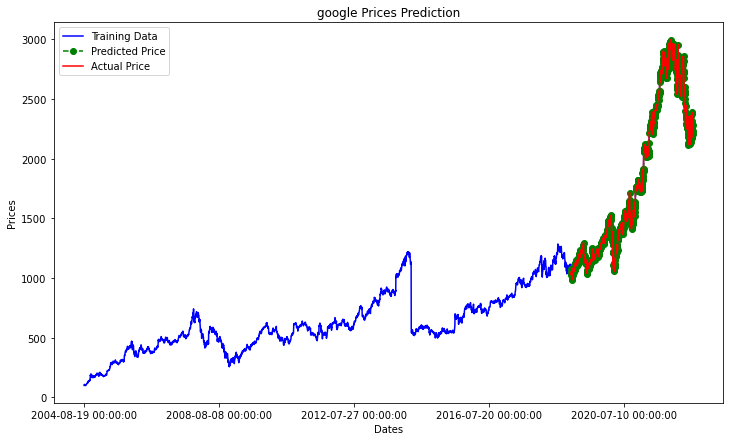

In [215]:
plt.figure(figsize=(12,7))
plt.plot(googl_data['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.title('google Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,4507, 1000), googl_data['date'][0:4507:1000])
plt.legend()
# fig, ax = plt.subplots(figsize=(16,8))
# ax.plot(train_data["close"])
# ax.plot(valid_data[['close',"Predictions"]])
# plt.legend(['Train', 'Val', 'Predictions'])

In [216]:
googl_data

,date,open,high,low,close,volume
0,2004-08-19,100.01,104.06,95.9600,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.5000,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.0500,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.5700,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.8800,106.000,9188600.0
...,...,...,...,...,...,...
4503,2022-07-11,2359.96,2359.96,2306.6100,2313.530,1562185.0
4504,2022-07-12,2324.30,2339.48,2273.8044,2280.410,1497985.0
4505,2022-07-13,2234.02,2283.92,2224.0300,2227.070,2186101.0
4506,2022-07-14,2204.21,2221.86,2167.4600,2207.350,1850152.0


In [217]:
googl_data.to_csv('Google_data.csv')